In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aqi_data.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
df['AQI Value'] = pd.to_numeric(df['AQI Value'], errors='coerce')

In [4]:
# Drop rows with missing AQI values
df = df.dropna(subset=['AQI Value'])

In [5]:
# Define AQI categories if needed (redundant here but useful for plotting)
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI Category Derived'] = df['AQI Value'].apply(aqi_category)

C:\Users\jirag\AppData\Local\Temp\ipykernel_4008\4174879673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')


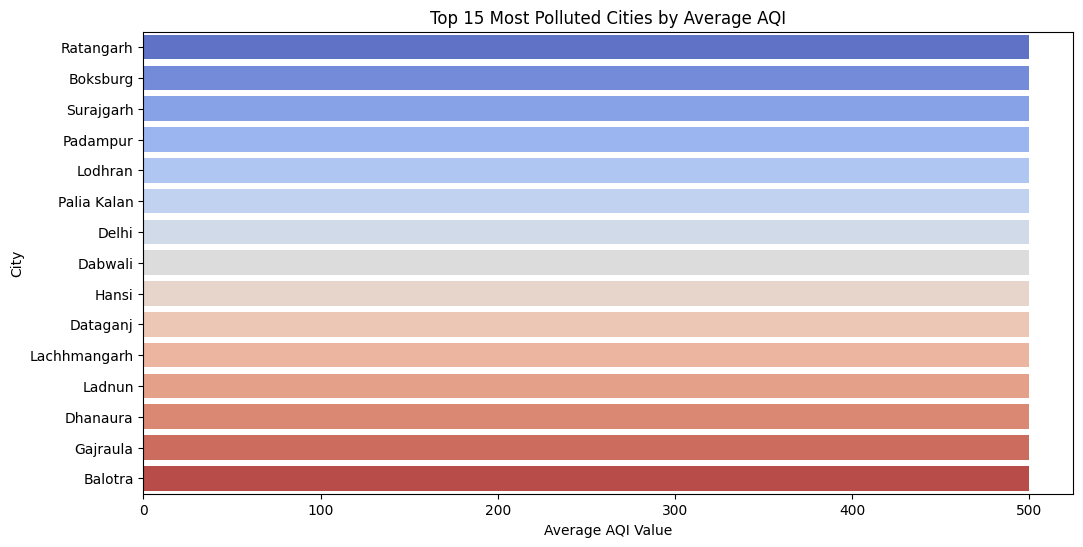

In [6]:
# Plot AQI values per city
plt.figure(figsize=(12, 6))
top_cities = df.groupby('City')['AQI Value'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 15 Most Polluted Cities by Average AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('City')
plt.show()

C:\Users\jirag\AppData\Local\Temp\ipykernel_4008\1465859958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AQI Category Derived', data=df, order=df['AQI Category Derived'].value_counts().index, palette='viridis')


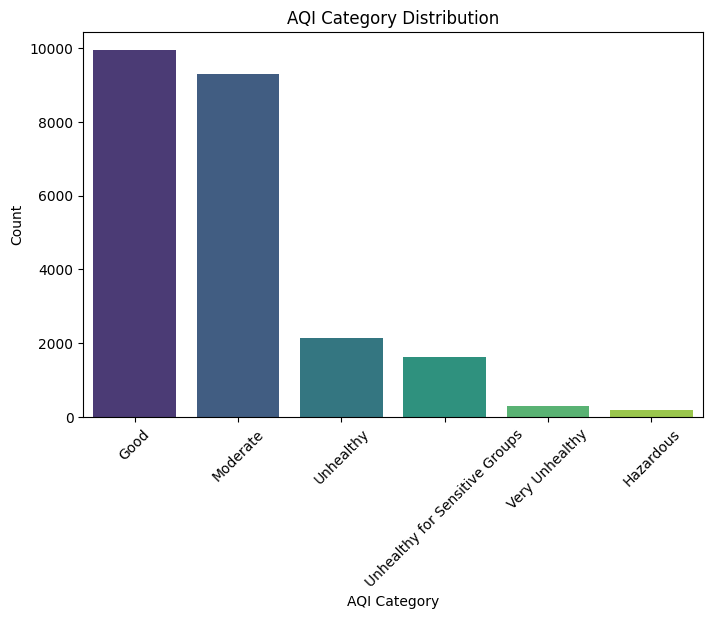

In [7]:
# Distribution of AQI categories
plt.figure(figsize=(8, 5))
sns.countplot(x='AQI Category Derived', data=df, order=df['AQI Category Derived'].value_counts().index, palette='viridis')
plt.title('AQI Category Distribution')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\jirag\AppData\Local\Temp\ipykernel_4008\1837699885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI Value', data=df_top, palette='Set3')


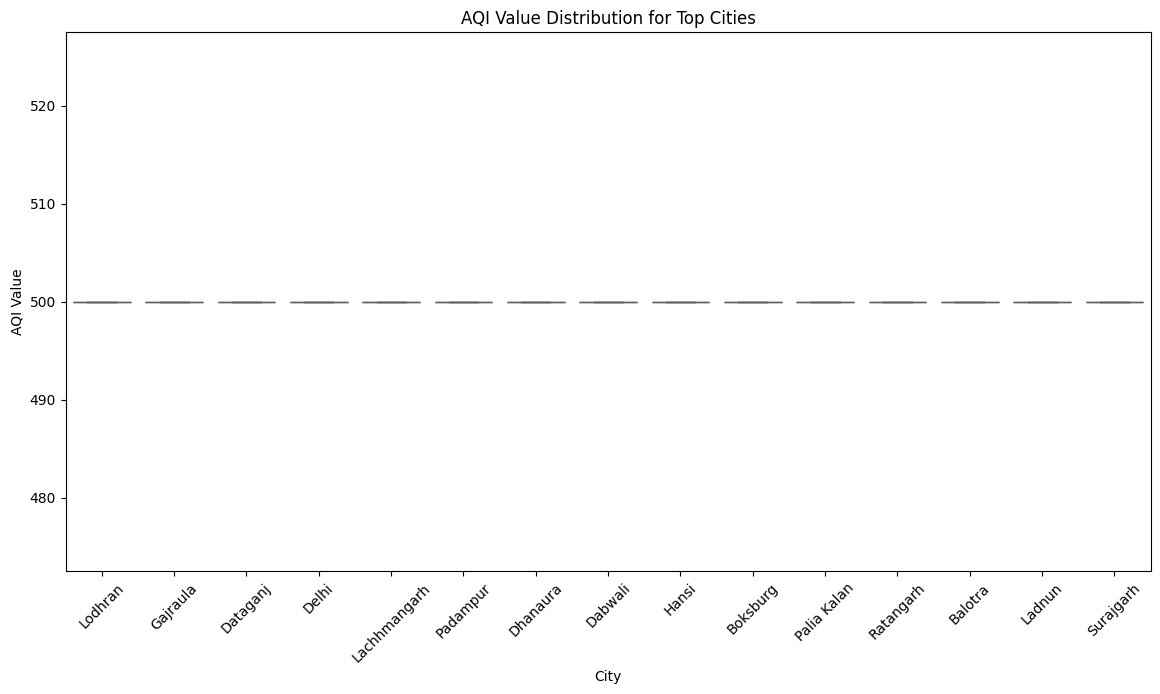

In [8]:
top_cities_list = top_cities.index.tolist()
df_top = df[df['City'].isin(top_cities_list)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='City', y='AQI Value', data=df_top, palette='Set3')
plt.xticks(rotation=45)
plt.title('AQI Value Distribution for Top Cities')
plt.ylabel('AQI Value')
plt.show()
